In [33]:
import sys
import os
import sys
import os
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error

# Import functions
sys.path.append(os.path.abspath('../src/data'))
from extract_for_model import extract_time_series



sys.path.append(os.path.abspath('../src/models'))
from test_harness import fit_model
from test_harness import get_models




In [34]:

input_path = '/home/reference/data_interim/software_private_annual_income_statements_INTERIM.csv'
features   = ['IQ_TOTAL_REV','IQ_NI','IQ_EITDA]
year_min   = 2012
steps      = 0
lim_test   = True
norm       = False

train_df, test_df = extract_time_series(input_path = input_path,\
                                                  features = features,
                                                    
                                                 lim_test = lim_test,\
                                                      norm = norm,\
                                                     steps = steps)


Size of RAW data: (2773, 6)
Size of RESHAPED data: (787, 9)
TEST  set size: (78, 9)
TRAIN set size: (709, 9)
TEST is 10% of all available datapoints


In [69]:
train_df


,company,year,quarter,IQ_TOTAL_REV+0,IQ_NI+0,IQ_EBITDA+0,IQ_TOTAL_REV+1,IQ_NI+1,IQ_EBITDA+1
2,IQ10127723,2015.0,Q4,3.969000,0.607000,0.915000,3.596000,-0.088000,0.004000
3,IQ10127723,2016.0,Q4,3.596000,-0.088000,0.004000,5.841000,1.320000,1.717000
7,IQ102267046,2014.0,Q4,5.543212,0.241210,0.297020,8.876981,0.045849,0.177679
8,IQ102267046,2015.0,Q4,8.876981,0.045849,0.177679,14.583558,0.404609,0.575876
12,IQ10348973,2014.0,Q4,16.500000,0.514000,2.448000,18.678000,0.695000,3.799000
...,...,...,...,...,...,...,...,...,...
2217,IQ997963,2017.0,Q4,24.907518,2.876562,2.245086,23.752401,-0.417858,-0.186561
2229,IQ998042,2014.0,Q4,7.426761,0.180078,0.646224,8.439799,0.463543,1.042842
2230,IQ998042,2015.0,Q4,8.439799,0.463543,1.042842,8.586635,0.398324,1.302963
2231,IQ998042,2016.0,Q4,8.586635,0.398324,1.302963,9.215815,0.082215,1.206183


In [36]:
test_df

,company,year,quarter,IQ_TOTAL_REV+0,IQ_NI+0,IQ_EBITDA+0,IQ_TOTAL_REV+1,IQ_NI+1,IQ_EBITDA+1
603,IQ22103794,2018.0,Q2,347.873000,4.391000,1.767000,372.943000,-97.572000,-108.611000
1007,IQ32896804,2017.0,Q4,4.936148,0.474035,0.466545,5.514805,0.684781,1.039787
1531,IQ530385,2018.0,Q2,3.444015,-0.955122,-0.690461,4.679427,-0.106653,0.117301
1715,IQ628301,2017.0,Q4,0.150000,0.159000,0.015000,1.500000,-0.471000,1.370000
529,IQ215997380,2017.0,Q4,5.544805,0.224797,0.856396,6.030485,0.319223,0.894059
...,...,...,...,...,...,...,...,...,...
1931,IQ773630,2017.0,Q4,3.469621,0.834958,0.361537,4.017887,1.181325,1.448734
57,IQ106833868,2017.0,Q4,19.390000,-25.648000,-1.202000,19.464000,-3.290000,3.780000
1389,IQ47809636,2017.0,Q4,113.983000,3.629000,20.763000,102.914000,-1.100000,30.728000
36,IQ105664079,2017.0,Q4,44.558000,5.523000,13.137000,57.709000,4.563000,13.446000


In [109]:
print(type(train_df))
print(test_df.shape)

<class 'pandas.core.frame.DataFrame'>
(78, 9)


In [106]:
import statsmodels.api as sm

In [114]:
x=sm.add_constant(train_df)

In [132]:
features_names = [['IQ_TOTAL_REV+0','IQ_NI+0']]
target = ['IQ_EBITDA+1']

In [118]:
import statsmodels.api as sm # import statsmodels 

X = train_df[['IQ_TOTAL_REV+0','IQ_NI+0']]## X usually means our input variables (or independent variables)
y = train_df["IQ_EBITDA+1"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            IQ_EBITDA+1   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     7671.
Date:                Thu, 31 Oct 2019   Prob (F-statistic):               0.00
Time:                        05:46:47   Log-Likelihood:                -3262.1
No. Observations:                 709   AIC:                             6530.
Df Residuals:                     706   BIC:                             6544.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.4643      0.938     -4.759      0.000      -6.306      -2.623
IQ_TOTAL_REV+0     0.1295      0.004     30.037      0.000       0.121       0.138
IQ_NI+0            1.1662      0.049     23.583      0.000       1.069       1.263
==============================================================================
Omnibus:                      602.237   Durbin-Watson:                   1.538
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           194582.361
Skew:                           2.803   Prob(JB):                         0.00
Kurtosis:                      83.965   Cond. No.                         525.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
from sklearn import linear_model

In [138]:
x_train = train_df[['IQ_TOTAL_REV+0','IQ_NI+0']]
x_test = test_df[['IQ_TOTAL_REV+0','IQ_NI+0']]
y_train = train_df['IQ_EBITDA+1']
y_test = test_df['IQ_EBITDA+1']

In [163]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))



Coefficients: 
 [0.12950589 1.16623645]
Mean squared error: 220661.71
Variance score: -4.47


In [162]:
#importing our function for splitting the data and an additional cross validation function,
from sklearn.model_selection import train_test_split, cross_val_score



In [145]:
x_train = train_df[['IQ_TOTAL_REV+0','IQ_NI+0']]
x_test = test_df[['IQ_TOTAL_REV+0','IQ_NI+0']]
y_train = train_df['IQ_EBITDA+1']
y_test = test_df['IQ_EBITDA+1']

In [152]:
print(x_train)

      IQ_TOTAL_REV+0   IQ_NI+0
2           3.969000  0.607000
3           3.596000 -0.088000
7           5.543212  0.241210
8           8.876981  0.045849
12         16.500000  0.514000
...              ...       ...
2217       24.907518  2.876562
2229        7.426761  0.180078
2230        8.439799  0.463543
2231        8.586635  0.398324
2232        9.215815  0.082215

[709 rows x 2 columns]


In [153]:
#Allows us access to Scikit-learn linear regression model,
import sklearn.metrics
from sklearn.linear_model import LinearRegression

#Instantiate the regression model and setting parameters if any,
reg_model = LinearRegression()

In [156]:
#fitting the training data to the model,
reg_model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [161]:
from sklearn.model_selection import cross_val_score
import math

cv_reg_model = LinearRegression()
cv_scores = cross_val_score(cv_reg_model, x_train, y_train,cv=10, scoring='r2')

#outputs the scores
print('Cross Validation scores: {}'.format(cv_scores))
print("\nAverage 10-Fold CV Score: {}".format(np.mean(cv_scores)))

Cross Validation scores: [-0.69692435 -1.30986806  0.60950615  0.36074744  0.82123779  0.48778215
 -2.53232047 -1.77124355  0.28790714  0.77815144]

Average 10-Fold CV Score: -0.29650243141672744


Sample predictions are:
 [45.70829189 -3.27215769 -5.13213269 -4.25939735 -3.48400347]


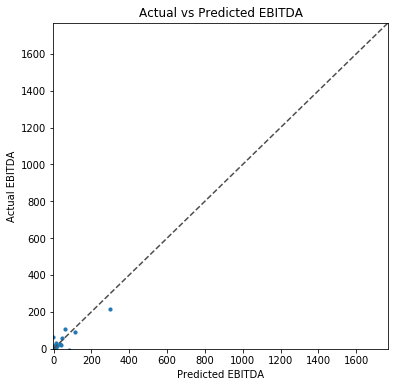

In [166]:
#prediction values using testing set
y_pred = reg_model.predict(X_test)

#printing sample of predictions
print('Sample predictions are:\n', y_pred[:5].flatten())

y_pred_a = pd.DataFrame(y_pred)
y_test_a = y_test.reset_index(drop=True, inplace=False)
pred_act_df = pd.concat([y_test_a,y_pred_a], axis=1).sort_values(1,axis=1).reset_index(drop=True)

#output samples of our predicted values
plt.figure(figsize=(6, 6))
maxlimit = pred_act_df['IQ_EBITDA+1'].max()
plt.xlim(-1, maxlimit)
plt.ylim(-1, maxlimit)
plt.scatter(pred_act_df[0], pred_act_df['IQ_EBITDA+1'], s=10)
plt.xlabel('Predicted EBITDA')
plt.ylabel('Actual EBITDA')
plt.plot([-1,maxlimit], [-1,maxlimit], ls="--", c=".3")
plt.title('Actual vs Predicted EBITDA')
plt.show()